# Algoritmo KMeans

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo KMeans](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [6]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV
from utils.parametros import ParametrosKmeans
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from models.kmeans import Kmeans
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

In [3]:
parametros_grid_search = {
    "n_clusters": [i for i in range(2, 14)],
    "init": ["k-means++", "random"],
    "n_init": [1, 2, 3, 4, 5, "auto"],
    "max_iter": [j for j in range(100, 600, 100)],
    "algorithm": ["lloyd", "elkan"]
}

### DATASET Funcao Renal

#### Teste com o GridSearchCV

In [4]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_funcao_renal.values)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
#print(grid_search.cv_results_)

KMeans(algorithm='elkan', n_clusters=13, n_init=4)
-80.25419918707388
933
{'mean_fit_time': array([0.01933603, 0.01296611, 0.01669741, ..., 0.069807  , 0.08103619,
       0.16183748]), 'std_fit_time': array([0.02064284, 0.00082875, 0.00046133, ..., 0.00764863, 0.00514688,
       0.00706979]), 'mean_score_time': array([0.00275793, 0.00282502, 0.00301409, ..., 0.00310597, 0.00310054,
       0.00319085]), 'std_score_time': array([0.0002106 , 0.00014165, 0.00018473, ..., 0.00011882, 0.00015824,
       0.00018246]), 'param_algorithm': masked_array(data=['lloyd', 'lloyd', 'lloyd', ..., 'elkan', 'elkan',
                   'elkan'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_init': masked_array(data=['k-means++', 'k-means++', 'k-means++', ..., 'random',
                   'random', 'random'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'para

#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [16]:
soma_dos_quadrados_funcao_renal = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 4,
                    nro_max_iteracao = 500,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(df_funcao_renal.values)
    soma_dos_quadrados_funcao_renal.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

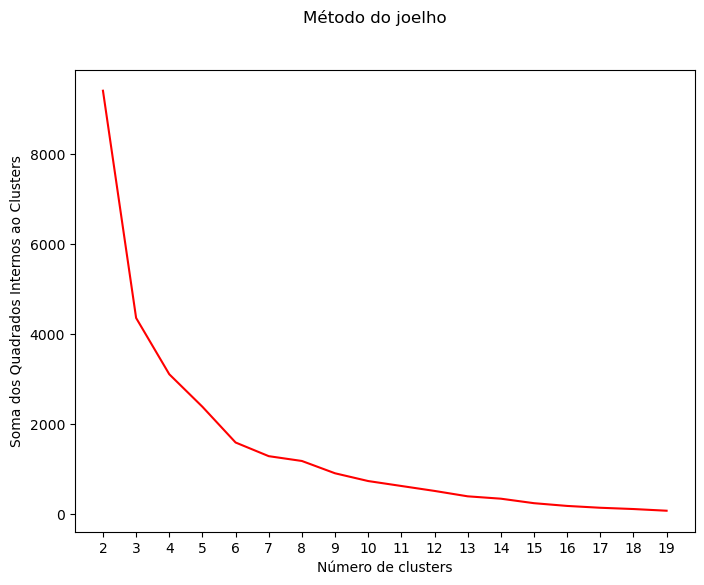

In [20]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_funcao_renal, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 4 joelhos:
- x = `3`;
- x = `4`;
- x = `6`;
- x = `7`.

### DATASET Dieta Grupos

#### Teste com o GridSearchCV

In [5]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_dieta_grupos.values)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
#print(grid_search.cv_results_)

KMeans(init='random', max_iter=200, n_clusters=13, n_init=3)
-129124.7937636682
500


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [7]:
soma_dos_quadrados_dieta_grupos = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "random",
                    nro_tentativas_centroides = 3,
                    nro_max_iteracao = 200,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "lloyd")
    kmeans.fit(df_dieta_grupos.values)
    soma_dos_quadrados_dieta_grupos.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

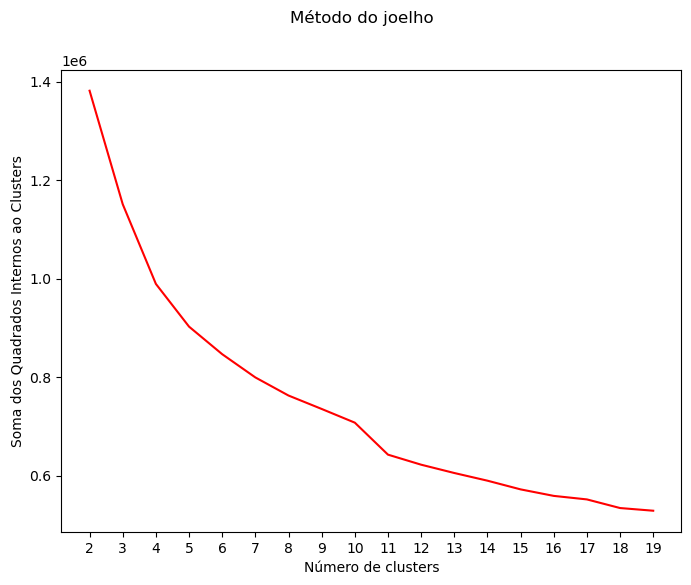

In [9]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_dieta_grupos, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 5 joelhos:
- x = `3`;
- x = `4`;
- x = `5`;
- x = `8`;
- x = `11`.

### DATASET Perfil Hepatico

#### Teste com o GridSearchCV

In [10]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_perfil_hepatico.values)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
#print(grid_search.cv_results_)

KMeans(algorithm='elkan', max_iter=200, n_clusters=13)
-1597.3019400220442
863


/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [11]:
soma_dos_quadrados_perfil_hepatico = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 3,
                    nro_max_iteracao = 200,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(df_perfil_hepatico.values)
    soma_dos_quadrados_perfil_hepatico.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

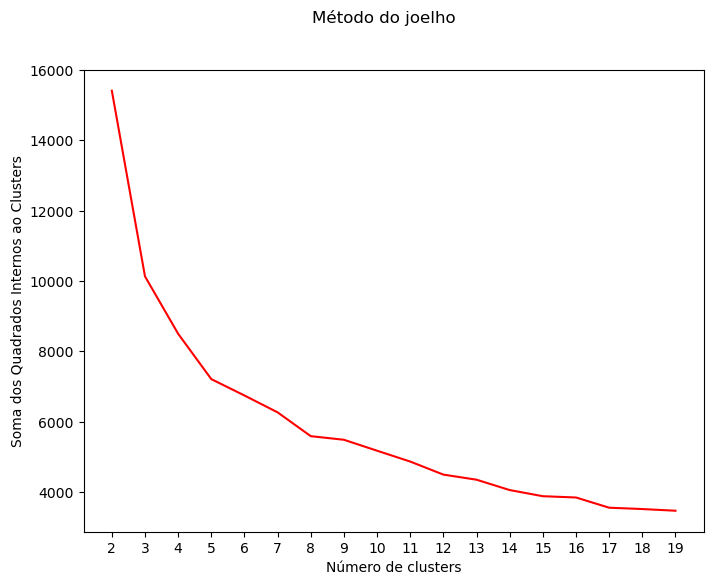

In [12]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_perfil_hepatico, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 6 joelhos:
- x = `3`;
- x = `5`;
- x = `8`;
- x = `12`;
- x = `15`;
- x = `17`.

### DATASET ureia

#### Teste com o GridSearchCV

In [ ]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_ureia_sem_nulos = simple_input.fit_transform(df_ureia.values)

In [7]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_ureia_sem_nulos)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(algorithm='elkan', max_iter=100, n_clusters=12)
-799792893372.1405
785


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [9]:
soma_dos_quadrados_ureia = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 12,
                    nro_max_iteracao = 100,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(df_ureia_sem_nulos)
    soma_dos_quadrados_ureia.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

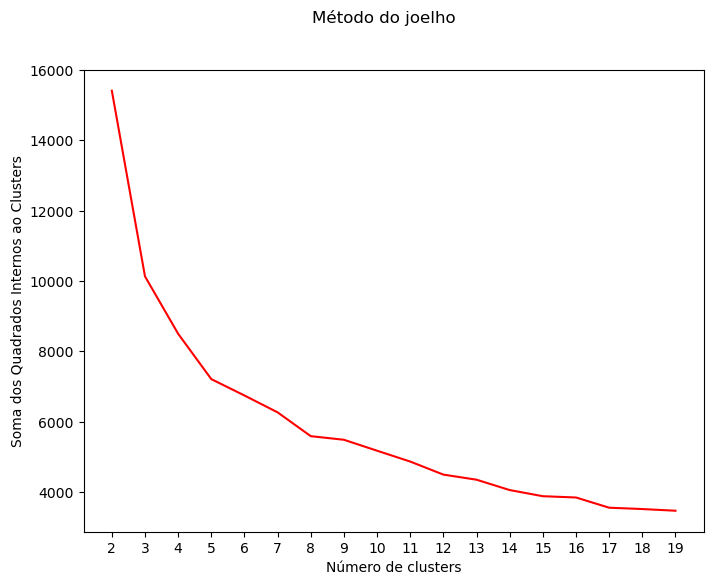

In [ ]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_ureia, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 6 joelhos:
- x = `3`;
- x = `5`;
- x = `8`;
- x = `12`;
- x = `15`;
- x = `17`.

### DATASET creatinina

#### Teste com o GridSearchCV

In [10]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_creatinina_sem_nulos = simple_input.fit_transform(df_creatinina.values)

In [11]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_creatinina_sem_nulos)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(algorithm='elkan', max_iter=500, n_clusters=13)
-199994984113.73712
1079


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [12]:
soma_dos_quadrados_creatinina = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 13,
                    nro_max_iteracao = 500,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(df_creatinina_sem_nulos)
    soma_dos_quadrados_creatinina.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

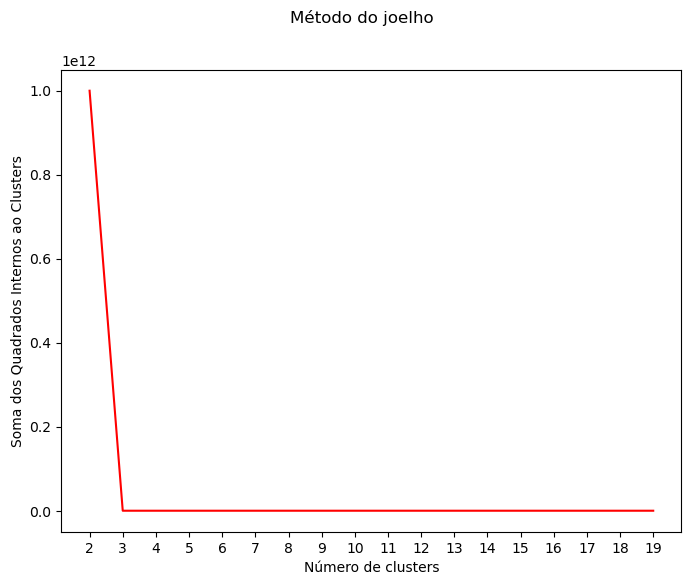

In [13]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_creatinina, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos um único joelho em:
- x = `3`.

## Implementação do Algoritmo

### DATASET Funcao Renal

#### Recebendo os hiper-parâmetros testados acima

In [4]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "funcao_renal")

#### Criando o modelo - seguindo o GridSearchCV

In [27]:
kmeans_funcao_renal = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_funcao_renal.fit(df_funcao_renal.values)

KMeans(algorithm='elkan', max_iter=500, n_clusters=13, n_init=4,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [28]:
print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 389.541
Labels:  [0 0 0 ... 6 4 0]


In [29]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_funcao_renal = kmeans_funcao_renal.fit_predict(df_funcao_renal.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_funcao_renal.values, y_funcao_renal, metric = metrica))

davies_bouldin = davies_bouldin_score(df_funcao_renal.values, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal.values, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.916432991070862, 0.06138797315388123, 0.9156730802047989, 0.916432991070862, 0.9156730802047989, 0.916432991070862]
DAVIS-BOULDIN SCORE:  0.503934100967088
CALINSKI-HARABASZ SCORE:  53939.28151577068


#### Criando o modelo - seguindo o método do joelho

In [30]:
joelhos_percebidos = [3, 4, 6, 7]

for i in joelhos_percebidos:
    kmeans_funcao_renal = Kmeans(nro_clusters = i,
                                metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiperparametros_kmeans.getTolerancia(),
                                semente = hiperparametros_kmeans.getSemente_randomica(),
                                algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_funcao_renal.fit(df_funcao_renal.values)
    print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 4354.136
Labels:  [0 0 0 ... 0 2 0]
Inercia: 3103.162
Labels:  [0 0 0 ... 3 2 0]
Inercia: 1585.942
Labels:  [0 0 0 ... 5 2 0]
Inercia: 1282.181
Labels:  [0 0 0 ... 6 5 0]


Acima, podemos notar que, a partir de `x = 6`, o ganho adicional é muito pequeno. Então para otimização dos testes `6` será escolhido como número de clusters.

In [31]:
kmeans_funcao_renal = Kmeans(nro_clusters = 6,
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_funcao_renal.fit(df_funcao_renal.values)

KMeans(algorithm='elkan', max_iter=500, n_clusters=6, n_init=4, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [32]:
print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 1585.942
Labels:  [0 0 0 ... 5 2 0]


In [33]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_funcao_renal = kmeans_funcao_renal.fit_predict(df_funcao_renal.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_funcao_renal.values, y_funcao_renal, metric = metrica))

davies_bouldin = davies_bouldin_score(df_funcao_renal.values, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal.values, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.7773957623742003, 0.09648184484186509, 0.7785646342027243, 0.7773957623742003, 0.7785646342027243, 0.7773957623742003]
DAVIS-BOULDIN SCORE:  0.6438692786026571
CALINSKI-HARABASZ SCORE:  30696.880328426898


### DATASET Dieta Grupos

#### Recebendo os hiper-parâmetros testados acima

In [20]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "dieta_grupos")

#### Criando o modelo - seguindo o GridSearchCV

In [21]:
kmeans_dieta_grupos = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_dieta_grupos.fit(df_dieta_grupos.values)

KMeans(init='random', max_iter=200, n_clusters=13, n_init=3, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [22]:
print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 605444.076
Labels:  [ 6  5 10 ...  4  3 10]


In [23]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_dieta_grupos = kmeans_dieta_grupos.fit_predict(df_dieta_grupos.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_dieta_grupos.values, y_dieta_grupos, metric = metrica))

davies_bouldin = davies_bouldin_score(df_dieta_grupos.values, y_dieta_grupos)
calinski = calinski_harabasz_score(df_dieta_grupos.values, y_dieta_grupos)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.2237785923896099, -0.14017645312345056, 0.24362133868822045, 0.2237785923896099, 0.24362133868822045, 0.2237785923896099]
DAVIS-BOULDIN SCORE:  1.4487466883155198
CALINSKI-HARABASZ SCORE:  813.0685221478985


#### Criando o modelo - seguindo o método do joelho

In [24]:
joelhos_percebidos = [3, 4, 5, 8, 11]

for i in joelhos_percebidos:
    kmeans_dieta_grupos = Kmeans(nro_clusters = i,
                                 metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                 nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                 nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                 tolerancia = hiperparametros_kmeans.getTolerancia(),
                                 semente = hiperparametros_kmeans.getSemente_randomica(),
                                 algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_dieta_grupos.fit(df_dieta_grupos.values)
    print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 1151207.318
Labels:  [2 0 1 ... 2 0 1]
Inercia: 989404.496
Labels:  [2 0 3 ... 2 0 3]
Inercia: 902650.675
Labels:  [4 0 2 ... 4 0 2]
Inercia: 762747.706
Labels:  [1 2 0 ... 1 0 7]
Inercia: 642709.617
Labels:  [ 8  6 10 ...  8  5 10]


Acima, podemos notar que, a partir de `x = 11`, o ganho adicional é muito pequeno. Então para otimização dos testes `11` será escolhido como número de clusters.

In [25]:
kmeans_dieta_grupos = Kmeans(nro_clusters = 11,
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_dieta_grupos.fit(df_dieta_grupos.values)

KMeans(init='random', max_iter=200, n_clusters=11, n_init=3, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [27]:
print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 642709.617
Labels:  [ 8  6 10 ...  8  5 10]


In [28]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_dieta_grupos = kmeans_dieta_grupos.fit_predict(df_dieta_grupos.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_dieta_grupos.values, y_dieta_grupos, metric = metrica))

davies_bouldin = davies_bouldin_score(df_dieta_grupos.values, y_dieta_grupos)
calinski = calinski_harabasz_score(df_dieta_grupos.values, y_dieta_grupos)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.22969157597737852, -0.16290378563019012, 0.24763493631266295, 0.22969157597737852, 0.24763493631266295, 0.22969157597737852]
DAVIS-BOULDIN SCORE:  1.3936275354381118
CALINSKI-HARABASZ SCORE:  900.5063587284429


### DATASET Perfil Hepatico

#### Recebendo os hiper-parâmetros testados acima

In [29]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "perfil_hepatico")

#### Criando o modelo - seguindo o GridSearchCV

In [30]:
kmeans_perfil_hepatico = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                                metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiperparametros_kmeans.getTolerancia(),
                                semente = hiperparametros_kmeans.getSemente_randomica(),
                                algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_perfil_hepatico.fit(df_perfil_hepatico.values)

KMeans(algorithm='elkan', max_iter=200, n_clusters=13, n_init=3,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [31]:
print("Inercia: %.3f" % kmeans_perfil_hepatico.getDistanciaAoQuadrado())
print("Labels: ", kmeans_perfil_hepatico.getLabels())

Inercia: 4351.758
Labels:  [ 4  4  4 ...  3  7 11]


In [32]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_perfil_hepatico = kmeans_perfil_hepatico.fit_predict(df_perfil_hepatico.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_perfil_hepatico.values, y_perfil_hepatico, metric = metrica))

davies_bouldin = davies_bouldin_score(df_perfil_hepatico.values, y_perfil_hepatico)
calinski = calinski_harabasz_score(df_perfil_hepatico.values, y_perfil_hepatico)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.5940908566917005, -0.045691752560986336, 0.5778983780633224, 0.5940908566917005, 0.5778983780633224, 0.5940908566917005]
DAVIS-BOULDIN SCORE:  1.2022516360203914
CALINSKI-HARABASZ SCORE:  4186.371043210966


#### Criando o modelo - seguindo o método do joelho

In [33]:
joelhos_percebidos = [3, 4, 5, 8, 11]

for i in joelhos_percebidos:
    kmeans_perfil_hepatico = Kmeans(nro_clusters = i,
                                    metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                    nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                    nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                    tolerancia = hiperparametros_kmeans.getTolerancia(),
                                    semente = hiperparametros_kmeans.getSemente_randomica(),
                                    algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_perfil_hepatico.fit(df_perfil_hepatico.values)
    print("Inercia: %.3f" % kmeans_perfil_hepatico.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_perfil_hepatico.getLabels())

Inercia: 10133.479
Labels:  [1 1 1 ... 0 0 2]
Inercia: 8502.242
Labels:  [3 3 3 ... 2 1 2]
Inercia: 7212.032
Labels:  [0 0 0 ... 2 2 4]
Inercia: 5589.548
Labels:  [3 3 3 ... 1 1 2]
Inercia: 4867.509
Labels:  [ 0  0  0 ...  9  4 10]


Acima, podemos notar que, a partir de `x = 5`, o ganho adicional é muito pequeno. Então para otimização dos testes `5` será escolhido como número de clusters.

In [34]:
kmeans_perfil_hepatico = Kmeans(nro_clusters = 5,
                                metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiperparametros_kmeans.getTolerancia(),
                                semente = hiperparametros_kmeans.getSemente_randomica(),
                                algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_perfil_hepatico.fit(df_perfil_hepatico.values)

KMeans(algorithm='elkan', max_iter=200, n_clusters=5, n_init=3, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [37]:
print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 642709.617
Labels:  [ 8  6 10 ...  8  5 10]


In [38]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_perfil_hepatico = kmeans_perfil_hepatico.fit_predict(df_perfil_hepatico.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_perfil_hepatico.values, y_perfil_hepatico, metric = metrica))

davies_bouldin = davies_bouldin_score(df_perfil_hepatico.values, y_perfil_hepatico)
calinski = calinski_harabasz_score(df_perfil_hepatico.values, y_perfil_hepatico)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.5942696516792365, -0.02486884645945266, 0.5530078225728373, 0.5942696516792365, 0.5530078225728373, 0.5942696516792365]
DAVIS-BOULDIN SCORE:  1.0874692392701475
CALINSKI-HARABASZ SCORE:  6843.875348769018


### DATASET ureia

#### Recebendo os hiper-parâmetros testados acima

In [14]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "ureia")

#### Criando o modelo - seguindo o GridSearchCV

In [20]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_ureia_sem_nulos = simple_input.fit_transform(df_ureia.values)

In [22]:
kmeans_ureia = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                      metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                      nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                      nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                      tolerancia = hiperparametros_kmeans.getTolerancia(),
                      semente = hiperparametros_kmeans.getSemente_randomica(),
                      algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_ureia.fit(df_ureia_sem_nulos)

KMeans(algorithm='elkan', max_iter=100, n_clusters=5, n_init=12,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [19]:
print("Inercia: %.3f" % kmeans_ureia.getDistanciaAoQuadrado())
print("Labels: ", kmeans_ureia.getLabels())

Inercia: 2998906823801.844
Labels:  [0 0 0 ... 0 0 0]


In [23]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_ureia = kmeans_ureia.fit_predict(df_ureia_sem_nulos)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_ureia_sem_nulos, y_ureia, metric = metrica))

davies_bouldin = davies_bouldin_score(df_ureia_sem_nulos, y_ureia)
calinski = calinski_harabasz_score(df_ureia_sem_nulos, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.9981720062381471, 0.8422185923199177, 0.9980827591470386, 0.9981720062381471, 0.9980827591470386, 0.9981720062381471]
DAVIS-BOULDIN SCORE:  0.0014602555665681248
CALINSKI-HARABASZ SCORE:  2205.83596898602


#### Criando o modelo - seguindo o método do joelho

In [24]:
joelhos_percebidos = [3, 4, 5, 8, 11]

for i in joelhos_percebidos:
    kmeans_ureia = Kmeans(nro_clusters = i,
                                    metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                    nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                    nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                    tolerancia = hiperparametros_kmeans.getTolerancia(),
                                    semente = hiperparametros_kmeans.getSemente_randomica(),
                                    algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_ureia.fit(df_ureia_sem_nulos)
    print("Inercia: %.3f" % kmeans_ureia.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_ureia.getLabels())

Inercia: 5997202911307.771
Labels:  [0 0 0 ... 0 0 0]
Inercia: 3998543207253.171
Labels:  [0 0 0 ... 0 0 0]
Inercia: 2998906823801.844
Labels:  [0 0 0 ... 0 0 0]
Inercia: 13426737.824
Labels:  [0 0 0 ... 0 0 0]
Inercia: 3846567.583
Labels:  [0 9 0 ... 9 0 9]


Acima, podemos notar que, a partir de `x = 3`, o ganho adicional é muito pequeno. Então para otimização dos testes `3` será escolhido como número de clusters.

In [31]:
kmeans_ureia = Kmeans(nro_clusters = 3,
                      metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                      nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                      nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                      tolerancia = hiperparametros_kmeans.getTolerancia(),
                      semente = hiperparametros_kmeans.getSemente_randomica(),
                      algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_ureia.fit(df_ureia_sem_nulos)

KMeans(algorithm='elkan', max_iter=100, n_clusters=3, n_init=12,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [32]:
print("Inercia: %.3f" % kmeans_ureia.getDistanciaAoQuadrado())
print("Labels: ", kmeans_ureia.getLabels())

Inercia: 5997202911307.771
Labels:  [0 0 0 ... 0 0 0]


In [33]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_ureia = kmeans_ureia.fit_predict(df_ureia_sem_nulos)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_ureia_sem_nulos, y_ureia, metric = metrica))

davies_bouldin = davies_bouldin_score(df_ureia_sem_nulos, y_ureia)
calinski = calinski_harabasz_score(df_ureia_sem_nulos, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.9971175028521, 0.8554539080806279, 0.9968413805112749, 0.9971175028521, 0.9968413805112749, 0.9971175028521]
DAVIS-BOULDIN SCORE:  0.0026971035320219015
CALINSKI-HARABASZ SCORE:  1379.4778924386385


### DATASET creatinina

#### Recebendo os hiper-parâmetros testados acima

In [34]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "creatinina")

#### Criando o modelo - seguindo o GridSearchCV

In [35]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_creatinina_sem_nulos = simple_input.fit_transform(df_creatinina.values)

In [36]:
kmeans_creatinina = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                           metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                           nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                           nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                           tolerancia = hiperparametros_kmeans.getTolerancia(),
                           semente = hiperparametros_kmeans.getSemente_randomica(),
                           algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_creatinina.fit(df_creatinina_sem_nulos)

KMeans(algorithm='elkan', max_iter=500, n_clusters=3, n_init=13,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [38]:
print("Inercia: %.3f" % kmeans_creatinina.getDistanciaAoQuadrado())
print("Labels: ", kmeans_creatinina.getLabels())

Inercia: 64140.919
Labels:  [0 0 0 ... 0 0 0]


In [39]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_creatinina = kmeans_creatinina.fit_predict(df_creatinina_sem_nulos)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_creatinina_sem_nulos, y_creatinina, metric = metrica))

davies_bouldin = davies_bouldin_score(df_creatinina_sem_nulos, y_creatinina)
calinski = calinski_harabasz_score(df_creatinina_sem_nulos, y_creatinina)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.9996891098366424, 0.9204489450758886, 0.9996944707776186, 0.9996891098366424, 0.9996944707776186, 0.9996891098366424]
DAVIS-BOULDIN SCORE:  7.2034631428253185e-06
CALINSKI-HARABASZ SCORE:  77415122761.11066


#### Criando o modelo - seguindo o método do joelho

In [40]:
joelhos_percebidos = [3]

for i in joelhos_percebidos:
    kmeans_creatinina = Kmeans(nro_clusters = i,
                               metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                               nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                               nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                               tolerancia = hiperparametros_kmeans.getTolerancia(),
                               semente = hiperparametros_kmeans.getSemente_randomica(),
                               algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_creatinina.fit(df_creatinina_sem_nulos)
    print("Inercia: %.3f" % kmeans_creatinina.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_creatinina.getLabels())

Inercia: 64140.919
Labels:  [0 0 0 ... 0 0 0]


Acima, podemos notar que, a partir de `x = 3`, não há nenhum ganho adicional. Então para otimização dos testes `3` será escolhido como número de clusters.

In [41]:
kmeans_creatinina = Kmeans(nro_clusters = 3,
                           metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                           nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                           nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                           tolerancia = hiperparametros_kmeans.getTolerancia(),
                           semente = hiperparametros_kmeans.getSemente_randomica(),
                           algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_creatinina.fit(df_creatinina_sem_nulos)

KMeans(algorithm='elkan', max_iter=500, n_clusters=3, n_init=13,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [42]:
print("Inercia: %.3f" % kmeans_creatinina.getDistanciaAoQuadrado())
print("Labels: ", kmeans_creatinina.getLabels())

Inercia: 64140.919
Labels:  [0 0 0 ... 0 0 0]


In [43]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_creatinina = kmeans_creatinina.fit_predict(df_creatinina_sem_nulos)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_creatinina_sem_nulos, y_creatinina, metric = metrica))

davies_bouldin = davies_bouldin_score(df_creatinina_sem_nulos, y_creatinina)
calinski = calinski_harabasz_score(df_creatinina_sem_nulos, y_creatinina)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.9996891098366424, 0.9204489450758886, 0.9996944707776186, 0.9996891098366424, 0.9996944707776186, 0.9996891098366424]
DAVIS-BOULDIN SCORE:  7.2034631428253185e-06
CALINSKI-HARABASZ SCORE:  77415122761.11066
